# Data Preparation

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

file_path = '/content/drive/My Drive/Colab Notebooks/klinikparu800.csv'
df = pd.read_csv(file_path)
df.head(5)

,umur,jk,batuk,sesak,saturasi,paru kesan,tensi,nafas,nadi,diagnosa
0,3,l,tidak,tidak,100.0,dbn,normal,20.0,72,no
1,3,p,tidak,tidak,99.0,dbn,tinggi,20.0,98,no
2,3,p,ya,tidak,98.0,dbn,tinggi,18.0,72,no
3,3,l,ya,tidak,98.0,dbn,tinggi,20.0,73,no
4,3,l,ya,tidak,100.0,dbn,normal,20.0,93,no


In [3]:
df.shape

(800, 10)

## Exploratory Data Analysis dan Preprocessing

In [4]:
# Menghitung jumlah data asthma dan yang tidak asthma
jumlah_diagnosa = df['diagnosa'].value_counts()
print(jumlah_diagnosa)

diagnosa
no        525
asthma    275
Name: count, dtype: int64


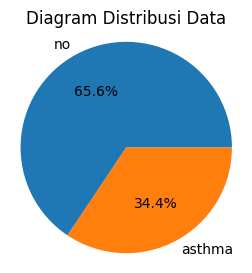

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(3, 3))
plt.pie(jumlah_diagnosa, labels=jumlah_diagnosa.index, autopct='%1.1f%%')
plt.title('Diagram Distribusi Data')
plt.axis('equal')
plt.show()

In [6]:
for column in df.columns:
    print(f"Isi data tiap fitur '{column}': {df[column].unique()}")

Isi data tiap fitur 'umur': [ 3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 20 21 22 23 26 27 28 29
 31 32 34 35 36 37 38 40 42 43 44 45 47 48 49 50 51 52 53 54 55 56 58 59
 60 61 62 63 64 67 70]
Isi data tiap fitur 'jk': ['l' 'p']
Isi data tiap fitur 'batuk': ['tidak' 'ya' nan]
Isi data tiap fitur 'sesak': ['tidak' 'ya' nan]
Isi data tiap fitur 'saturasi': [100.  99.  98.  96.  nan  97.  94.  95.  92.]
Isi data tiap fitur 'paru kesan': ['dbn' 'whezing' 'ronkhi' nan]
Isi data tiap fitur 'tensi': ['normal' 'tinggi' 'rendah' nan]
Isi data tiap fitur 'nafas': [20. 18. 22. 24. nan 26. 32. 10. 19.]
Isi data tiap fitur 'nadi': [ 72  98  73  93  91  84 107  68  67  97  70  85 102 110  71 104  69  66
  81  94 105  96  74  86 106  83  65 101  64  79  90  78  92  62 109  61
  82  88  63 100  76  75  60  77  59  87  99  80  95 108  89 103 112  58
 119 116 134 122 126 127 117 111  55 114]
Isi data tiap fitur 'diagnosa': ['no' 'asthma']


In [7]:
df.describe()

,umur,saturasi,nafas,nadi
count,800.000000,770.000000,790.000000,800.000000
mean,21.817500,99.170130,19.472152,86.831250
std,18.114065,1.016581,1.512469,15.091221
min,3.000000,92.000000,10.000000,55.000000
25%,9.000000,99.000000,18.000000,75.000000
50%,15.000000,99.000000,20.000000,87.000000
75%,35.000000,100.000000,20.000000,98.000000
max,70.000000,100.000000,32.000000,134.000000


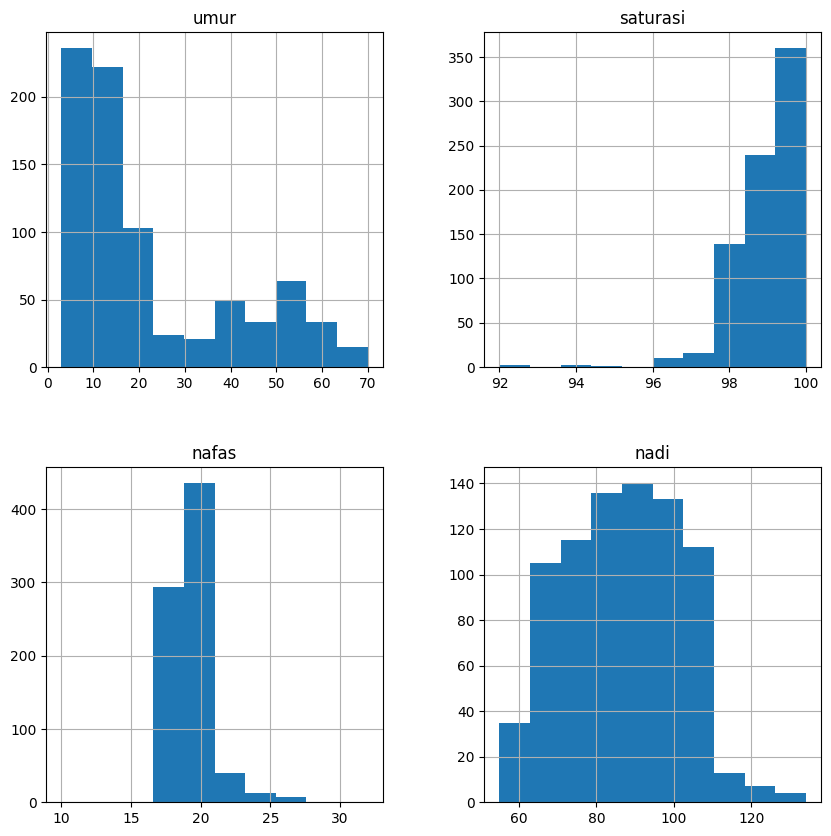

In [8]:
p = df.hist(figsize = (10,10))

In [9]:
# Cek missing value
print(df.isnull().sum())

umur           0
jk             0
batuk          4
sesak          1
saturasi      30
paru kesan    13
tensi          1
nafas         10
nadi           0
diagnosa       0
dtype: int64


In [10]:
# Mengatasi nilai yang hilang dengan nilai modus(data yang sering muncul)
for kolom in df.columns:
  modus = df[kolom].mode()[0]
  df[kolom].fillna(modus, inplace=True)
print(df.isnull().sum())

umur          0
jk            0
batuk         0
sesak         0
saturasi      0
paru kesan    0
tensi         0
nafas         0
nadi          0
diagnosa      0
dtype: int64


<ipython-input-10-b10045b3af62>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[kolom].fillna(modus, inplace=True)
<ipython-input-10-b10045b3af62>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.metho

In [11]:
# Cek type data
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   umur        800 non-null    int64  
 1   jk          800 non-null    object 
 2   batuk       800 non-null    object 
 3   sesak       800 non-null    object 
 4   saturasi    800 non-null    float64
 5   paru kesan  800 non-null    object 
 6   tensi       800 non-null    object 
 7   nafas       800 non-null    float64
 8   nadi        800 non-null    int64  
 9   diagnosa    800 non-null    object 
dtypes: float64(2), int64(2), object(6)
memory usage: 62.6+ KB


In [12]:
# Ubah type data yang tidak sesuai
df['saturasi'] = df['saturasi'].astype("int64")
df['nafas'] = df['nafas'].astype("int64")
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   umur        800 non-null    int64 
 1   jk          800 non-null    object
 2   batuk       800 non-null    object
 3   sesak       800 non-null    object
 4   saturasi    800 non-null    int64 
 5   paru kesan  800 non-null    object
 6   tensi       800 non-null    object
 7   nafas       800 non-null    int64 
 8   nadi        800 non-null    int64 
 9   diagnosa    800 non-null    object
dtypes: int64(4), object(6)
memory usage: 62.6+ KB


In [13]:
# Cek data duplikat
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"\nNumber of duplicate rows: {num_duplicate_rows}")


Number of duplicate rows: 9


In [14]:
df = df.drop_duplicates()

# Cek data duplikat
duplicate_rows = df[df.duplicated()]
num_duplicate_rows = len(duplicate_rows)
print(f"\nJumlah baris duplikat: {num_duplicate_rows}")


Jumlah baris duplikat: 0


In [15]:
# Transformasi data dengan label encoder
from sklearn.preprocessing import LabelEncoder

# Memilih kolom yang akan di encoding
kolom1 = 'jk'
kolom2 = 'batuk'
kolom3 = 'sesak'
kolom4 = 'paru kesan'
kolom5 = 'tensi'


# Mengubah label kategori menjadi numerik
encoder = LabelEncoder()
df[kolom1] = encoder.fit_transform(df[kolom1].astype(str).replace({'l': '0', 'p': '1'}))
df[kolom2] = encoder.fit_transform(df[kolom2].astype(str).replace({'tidak': '0', 'ya': '1'}))
df[kolom3] = encoder.fit_transform(df[kolom3].astype(str).replace({'tidak': '0', 'ya': '1'}))
df[kolom4] = encoder.fit_transform(df[kolom4].astype(str).replace({'dbn': '0', 'whezing': '1', 'ronkhi':'2'}))
df[kolom5] = encoder.fit_transform(df[kolom5].astype(str).replace({'rendah': '0', 'normal': '1','tinggi':'2'}))
df['diagnosa'] = 1 - encoder.fit_transform(df['diagnosa'])
df

,umur,jk,batuk,sesak,saturasi,paru kesan,tensi,nafas,nadi,diagnosa
0,3,0,0,0,100,0,1,20,72,0
1,3,1,0,0,99,0,2,20,98,0
2,3,1,1,0,98,0,2,18,72,0
3,3,0,1,0,98,0,2,20,73,0
4,3,0,1,0,100,0,1,20,93,0
...,...,...,...,...,...,...,...,...,...,...
795,70,1,0,1,100,0,1,20,114,1
796,70,1,0,0,100,0,2,18,82,0
797,70,1,1,0,100,0,2,18,67,0
798,70,1,1,0,100,0,0,20,69,0


In [16]:
df.describe()

,umur,jk,batuk,sesak,saturasi,paru kesan,tensi,nafas,nadi,diagnosa
count,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000,791.000000
mean,21.692794,0.580278,0.366625,0.337547,99.199747,0.174463,1.426043,19.480405,86.771176,0.342604
std,18.088333,0.493826,0.482188,0.473172,1.006586,0.444266,0.507443,1.505873,14.960521,0.474881
min,3.000000,0.000000,0.000000,0.000000,92.000000,0.000000,0.000000,10.000000,55.000000,0.000000
25%,9.000000,0.000000,0.000000,0.000000,99.000000,0.000000,1.000000,18.000000,75.000000,0.000000
50%,15.000000,1.000000,0.000000,0.000000,99.000000,0.000000,1.000000,20.000000,87.000000,0.000000
75%,34.500000,1.000000,1.000000,1.000000,100.000000,0.000000,2.000000,20.000000,98.000000,1.000000
max,70.000000,1.000000,1.000000,1.000000,100.000000,2.000000,2.000000,32.000000,134.000000,1.000000


In [17]:
# Normalisasi dengan Min-Max
kolom_normalisasi = ['umur', 'saturasi', 'paru kesan', 'tensi', 'nafas', 'nadi']

# Melakukan normalisasi Min-Max
for kolom in kolom_normalisasi:
  df[kolom] = (df[kolom] - df[kolom].min()) / (df[kolom].max() - df[kolom].min())
df.head()

,umur,jk,batuk,sesak,saturasi,paru kesan,tensi,nafas,nadi,diagnosa
0,0.0,0,0,0,1.000,0.0,0.5,0.454545,0.215190,0
1,0.0,1,0,0,0.875,0.0,1.0,0.454545,0.544304,0
2,0.0,1,1,0,0.750,0.0,1.0,0.363636,0.215190,0
3,0.0,0,1,0,0.750,0.0,1.0,0.454545,0.227848,0
4,0.0,0,1,0,1.000,0.0,0.5,0.454545,0.481013,0


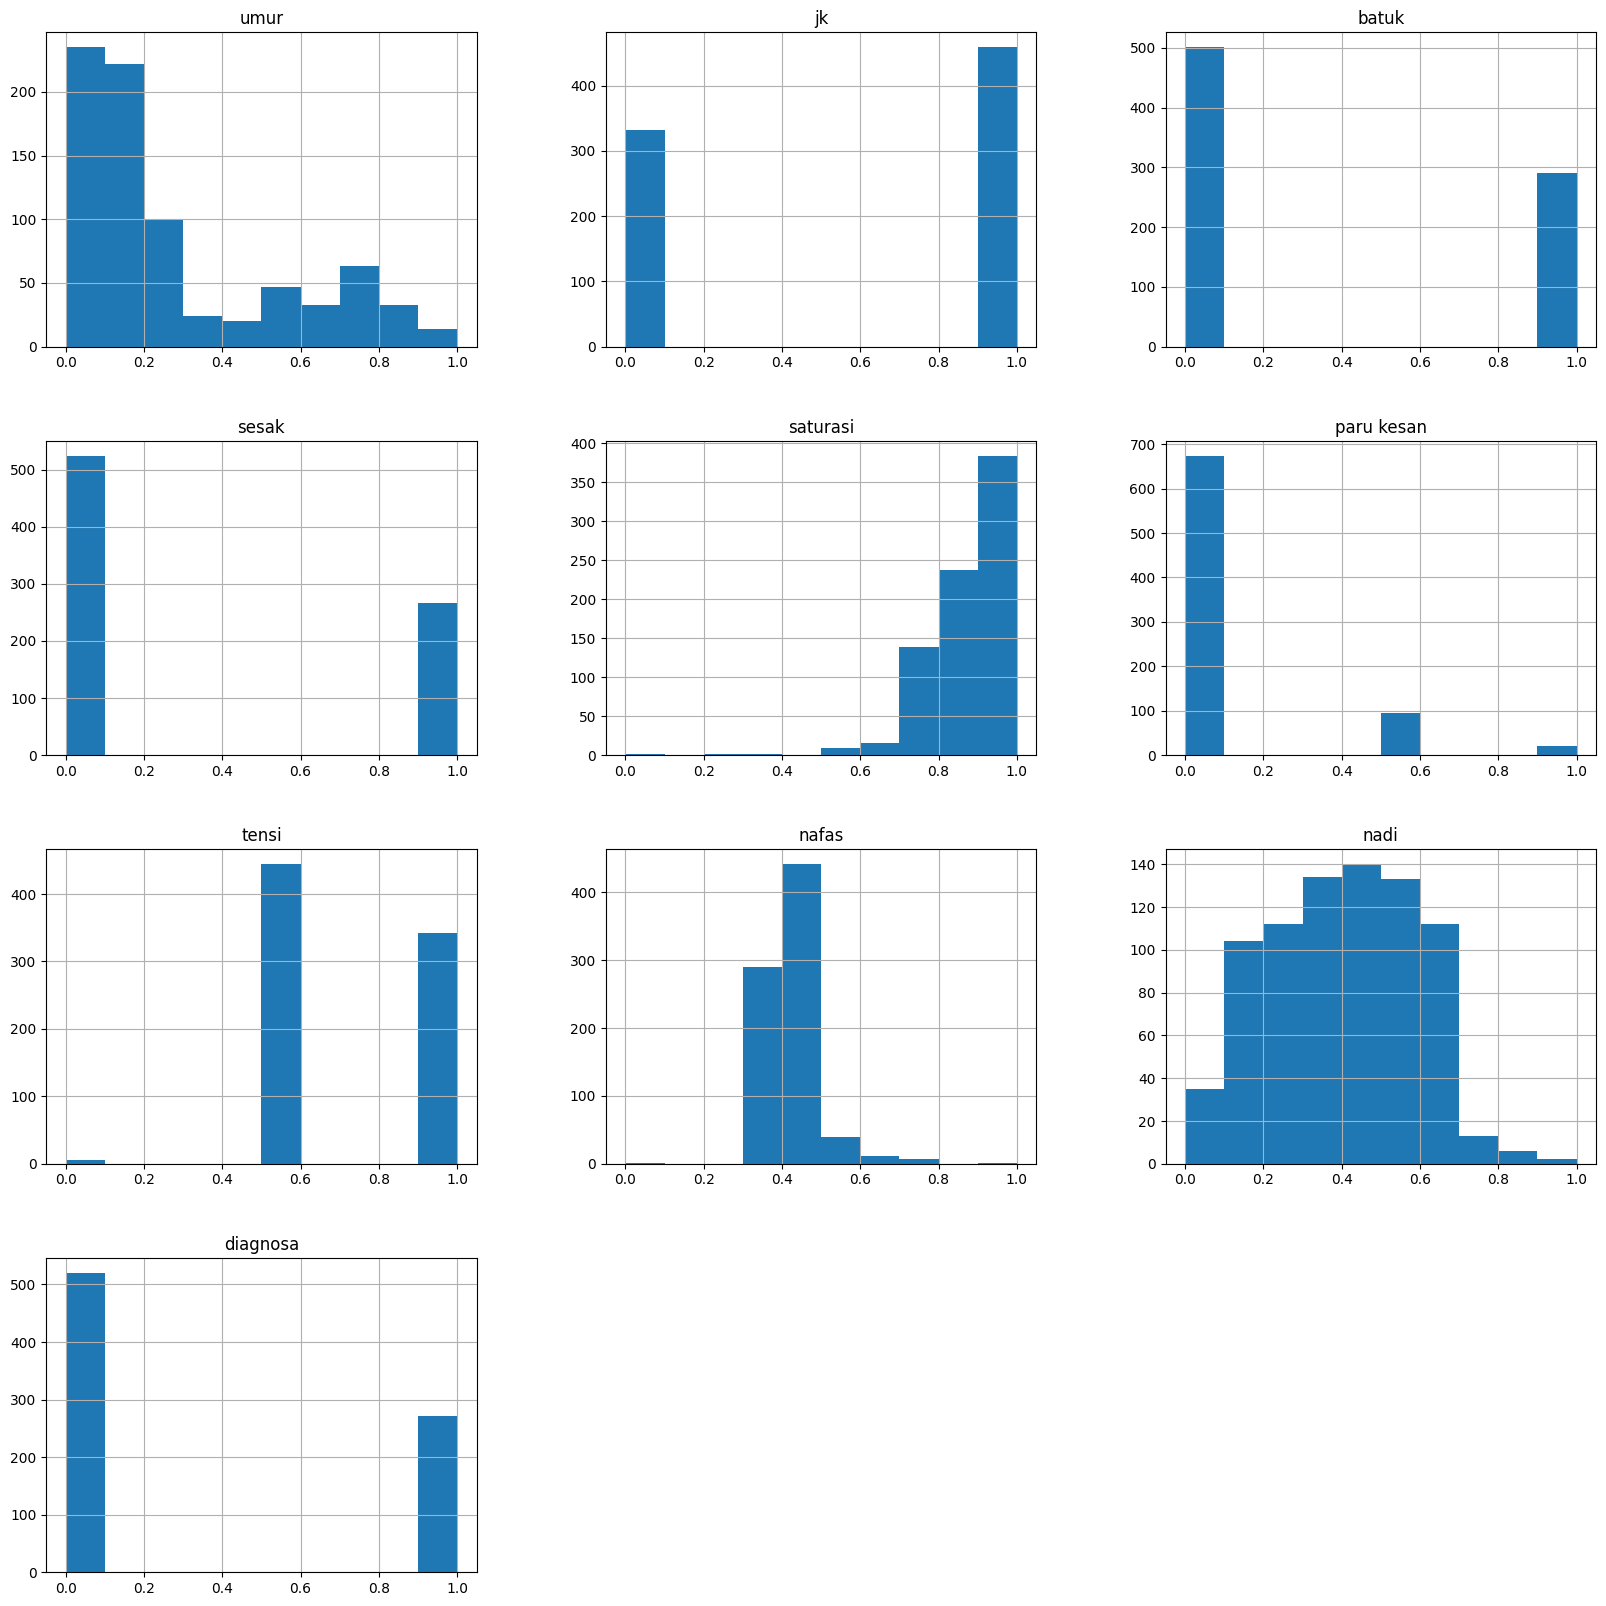

In [18]:
p = df.hist(figsize = (20,20))

In [47]:
# Split data
from sklearn.model_selection import train_test_split

# Memisahkan antara fitur (x) dan target (y)
x = df.drop('diagnosa', axis=1)  # Hapus kolom 'diagnosa' karena ini adalah target
y = df['diagnosa']

# Bagi data menjadi set pelatihan dan pengujian
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

print("Ukuran data pelatihan:", x_train.shape)
print("Ukuran data pengujian:", x_test.shape)

Ukuran data pelatihan: (553, 9)
Ukuran data pengujian: (238, 9)


# Hyperparameter Tuning dengan Grid Search

In [48]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV


param_grid = {
    'learning_rate': [0.01, 0.02, 0.1, 0.2],
    'max_depth': [2,3,4,5,6],
    'min_samples_split': [2,3,4,5,6],
    'min_samples_leaf': [2,3,4,5,6],
    'n_estimators': [7]
}

# Inisialisasi model GBM
gbm = GradientBoostingClassifier()

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(estimator=gbm, param_grid=param_grid, cv=5, scoring='accuracy')

# Latih model dengan GridSearchCV
grid_search.fit(x_train, y_train)

# # tampilkan hasil tiap kombinasi parameter
# results_df = pd.DataFrame(grid_search.cv_results_)
# columns_to_display = ['param_learning_rate', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_n_estimators', 'mean_test_score']
# display_df = results_df[columns_to_display]
# display_df['mean_test_score'] = display_df['mean_test_score'].apply(lambda x: f"{x:.5f}")
# display(display_df)

# Cetak hasil terbaik
print("Parameter terbaik:", grid_search.best_params_)
print("Akurasi  pada data pelatihan:", grid_search.best_score_)

Parameter terbaik: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 7}
Akurasi  pada data pelatihan: 0.9873382473382473


# Klasifikasi dan Evaluasi

In [49]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import time
import pickle

start_time = time.time()
# Buat variabel baru untuk klasifikasi dengan parameter terbaik
gb_classifier = GradientBoostingClassifier(
    learning_rate=grid_search.best_params_['learning_rate'],
    max_depth=grid_search.best_params_['max_depth'],
    min_samples_split=grid_search.best_params_['min_samples_split'],
    min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
    n_estimators=grid_search.best_params_['n_estimators'],
    random_state=42
)

# Latih model dengan data pelatihan
gb_classifier.fit(x_train, y_train)

# Waktu proses training
end_time = time.time()
execution_time = end_time - start_time
print(f"Waktu pelatihan: {execution_time} detik")

# Menyimpan model di drive
filename = '/content/drive/My Drive/Colab Notebooks/gb_model70.sav'
pickle.dump(gb_classifier, open(filename, 'wb'))

# Menghitung dan menyimpan akurasi model GBM pada setiap tahap boosting
staged_accuracy_train = []
staged_accuracy_test = []

for y_pred_train in gb_classifier.staged_predict(x_train):
    staged_accuracy_train.append(accuracy_score(y_train, y_pred_train))
for y_pred_test in gb_classifier.staged_predict(x_test):
    staged_accuracy_test.append(accuracy_score(y_test, y_pred_test))

Waktu pelatihan: 0.017874956130981445 detik


In [50]:
# # masukkan mode tersimpan
# loaded_model = pickle.load(open(filename, 'rb'))
# y_pred = loaded_model.predict(x_test)


In [51]:
# Lakukan prediksi pada data pengujian
y_pred = gb_classifier.predict(x_test)

In [52]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Akurasi Klasifikasi: {accuracy:.5f}")
print(f"Presisi: {precision:.5f}")
print(f"Recall: {recall:.5f}")
print(f"F1-score: {f1:.5f}")

Akurasi Klasifikasi: 0.99160
Presisi: 1.00000
Recall: 0.97436
F1-score: 0.98701


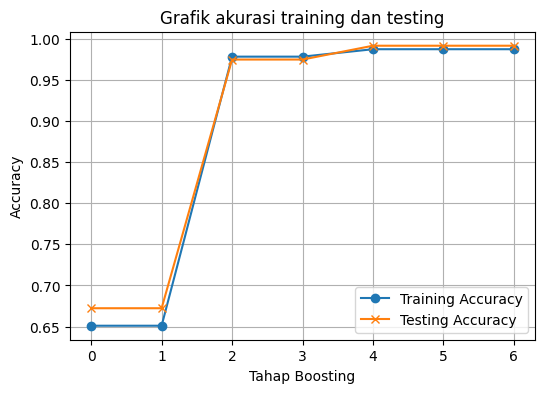

In [53]:
# Plot peningkatan akurasi training dan testing
plt.figure(figsize=(6, 4))
plt.plot(staged_accuracy_train, label='Training Accuracy', marker='o')
plt.plot(staged_accuracy_test, label='Testing Accuracy', marker='x')
plt.xlabel('Tahap Boosting')
plt.ylabel('Accuracy')
plt.title('Grafik akurasi training dan testing')
plt.legend()
plt.grid(True)
plt.show()

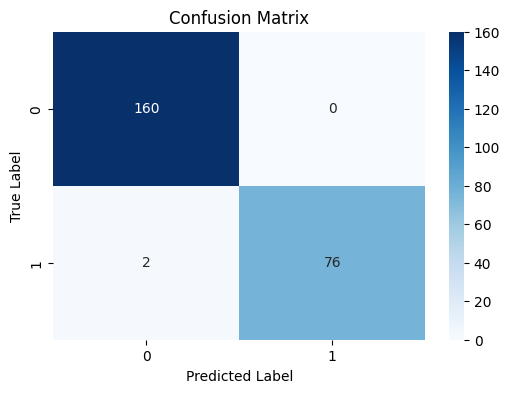

In [54]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

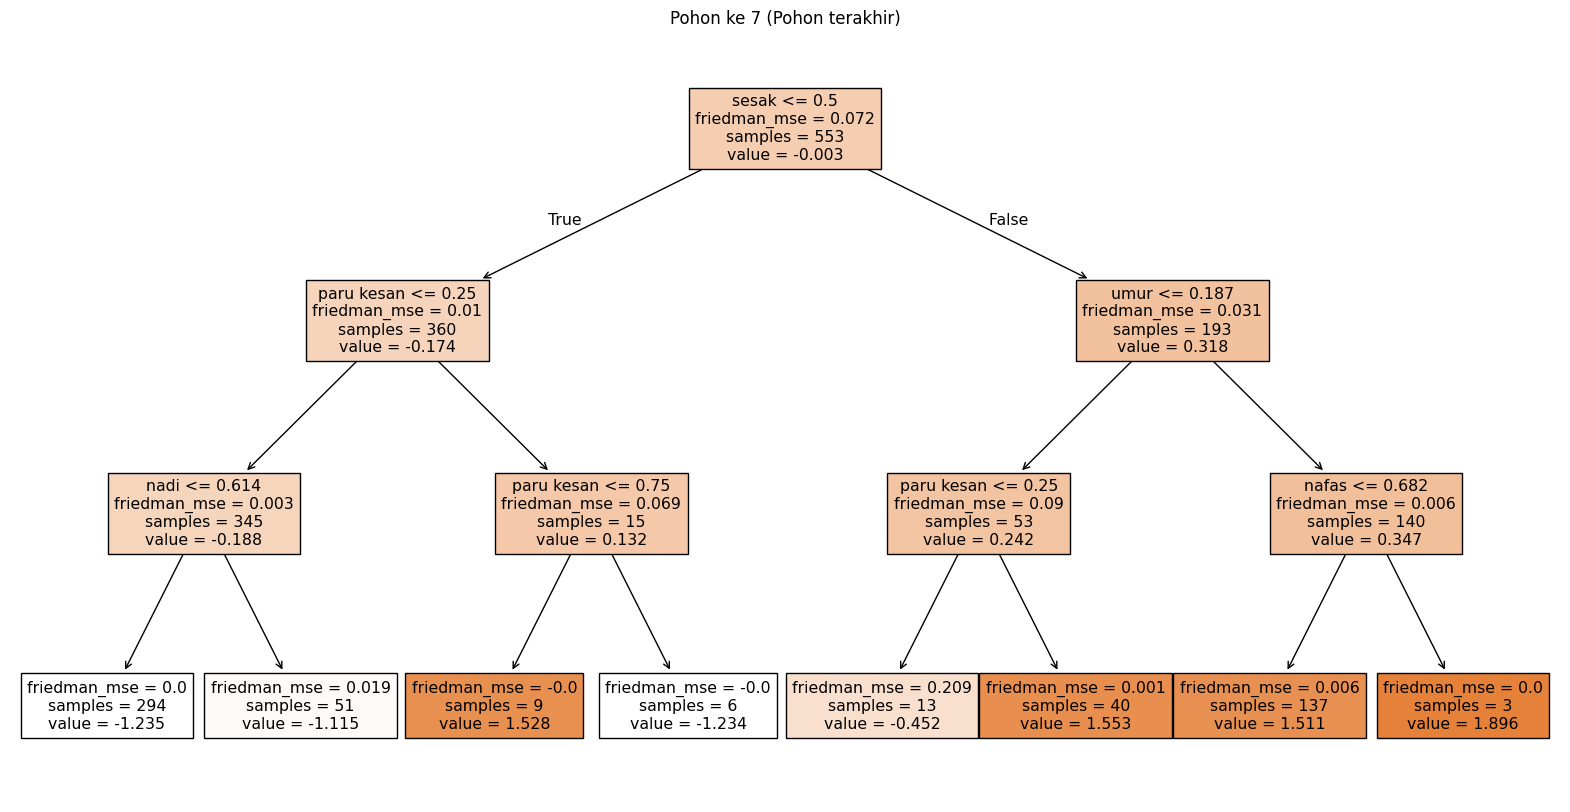

In [55]:
from sklearn.tree import plot_tree

# Tampilkan tree boosting terakhir
last_tree_index = len(gb_classifier.estimators_) - 1

plt.figure(figsize=(20, 10))
plot_tree(gb_classifier.estimators_[last_tree_index, 0],
          feature_names=x_train.columns,
          class_names=['No Asma', 'Asma'],
          filled=True)

plt.title(f"Pohon ke {last_tree_index + 1} (Pohon terakhir)")
plt.show()

# Predict dengan Data Baru

In [56]:
# # Menyimpan nama fitur dari data pelatihan
# feature_names = x_train.columns

# # Input data baru
# new_data = [[float(input("Masukkan nilai fitur {}: ".format(i+1))) for i in range(9)]]

# # Buat DataFrame pandas dengan nama kolom
# new_data_df = pd.DataFrame(new_data, columns=feature_names)

In [57]:
# loaded_model = pickle.load(open(filename, 'rb'))

# # Buat prediksi dengan data baru
# new_data_prediction = loaded_model.predict(new_data_df)
# if new_data_prediction == 0 :
#   print('tidak asma')
# else:
#   print ('asma')